# a PCA example

In [508]:
#import packages
import numpy as np
import random as rand
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [509]:
# declare global variables:
N = 100
d = 3
scaling = N*N*N

In [571]:
#make the dataset:
def make_data(N,d,scaling):
    weights = rand.sample(range(N),d)
    X = [[i]*d for i in np.linspace(0,N-1,N)]
    data = [np.multiply(x,weights) for x in X]
    noise = np.random.multivariate_normal(np.zeros(d),scaling*np.eye(d),N)
    data = data+noise
    return data

In [572]:
data = make_data(N,d,scaling)

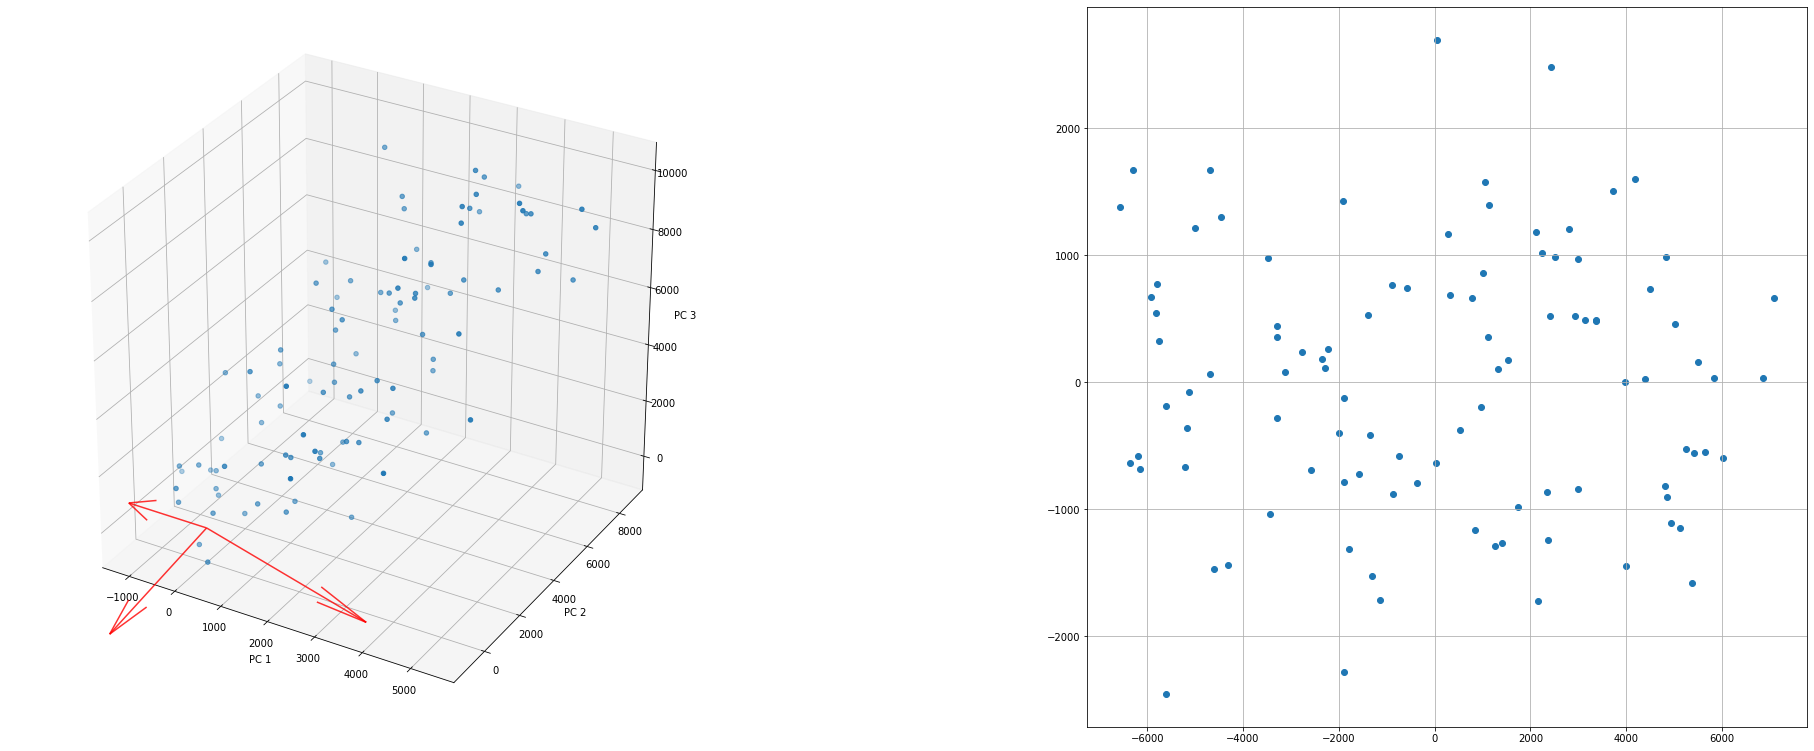

In [574]:
mean = np.mean(data, axis=0)

pca = PCA()
pca.fit(data-mean)
pca.info= { 'eigenvectors':pca.components_,
    'explained_variance_ratio':pca.explained_variance_ratio_,
    'covariance matrix': pca.get_covariance
   }
data_transformed = pca.transform(data-mean)

v0,v1,v2 = pca.info['eigenvectors']*4000

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_axes([0, 0, 1., 1., ], projection='3d')
ax1.scatter([x[0] for x in data],[x[1] for x in data], [x[2] for x in data])
ax1.quiver(0, 0, 0,v0[0], v0[1] ,v0[2],color = 'red', alpha = .8, label = 'PC 1')
ax1.quiver(0, 0, 0, v1[0], v1[1] ,v1[2], color = 'red', alpha = .8)
ax1.quiver(0, 0, 0, v2[0], v2[1] ,v2[2], color = 'red', alpha = .8)
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.set_zlabel("PC 3")


ax2 = fig.add_axes([1.5, 0, 1., 1.])
ax2.scatter([x[0] for x in data_transformed],[x[1] for x in data_transformed])

plt.grid()